In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

import tensorflow as tf

Using TensorFlow backend.


In [3]:
mainDir = os.listdir('D:/chest_xray')
#train_normal = 'D:/chest_xray/train/NORMAL'
#train_pneumonia = 'D:/chest_xray/train/PNEUMONIA'

In [4]:
mainDir

['chest_xray', 'test', 'train', 'val', '__MACOSX']

In [5]:
train_folder =  'D:/chest_xray/train/'
test_folder = 'D:/chest_xray/test/'
val_folder = 'D:/chest_xray/val/'

In [6]:
#training vs testing folders

os.listdir(train_folder)
train_norm = train_folder +'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'

train_norm, train_p

('D:/chest_xray/train/NORMAL/', 'D:/chest_xray/train/PNEUMONIA/')

In [7]:
train_gen=tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
            horizontal_flip=True)

In [8]:
test_gen=tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
            horizontal_flip=True)

In [9]:
train_generator=train_gen.flow_from_directory(
                train_folder,
                class_mode='binary')

Found 5216 images belonging to 2 classes.


In [10]:
validation_generator=train_gen.flow_from_directory(
                val_folder,
                class_mode='binary')

Found 16 images belonging to 2 classes.


In [11]:
test_generator = test_gen.flow_from_directory(
                    test_folder,
                    class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [12]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8,(4,4),activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(8,(4,4),activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(8,(4,4),activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1,activation='sigmoid'),
    
])

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [14]:
train=model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator                          
)

  ...
    to  
  ['...']
Train for 163 steps, validate for 1 steps
Epoch 1/5
163/163 [==============================] - 123s 757ms/step - loss: 0.3094 - acc: 0.8677 - val_loss: 0.7559 - val_acc: 0.7500
Epoch 2/5
163/163 [==============================] - 130s 796ms/step - loss: 0.1321 - acc: 0.9540 - val_loss: 1.0330 - val_acc: 0.6875
Epoch 3/5
163/163 [==============================] - 122s 750ms/step - loss: 0.1195 - acc: 0.9557 - val_loss: 0.4347 - val_acc: 0.8750
Epoch 4/5
163/163 [==============================] - 126s 773ms/step - loss: 0.0987 - acc: 0.9651 - val_loss: 0.5190 - val_acc: 0.8125
Epoch 5/5
163/163 [==============================] - 122s 746ms/step - loss: 0.0812 - acc: 0.9714 - val_loss: 0.2629 - val_acc: 0.8750


In [15]:
accuracy=train.history['acc']
val_acc=train.history['val_acc']
loss=train.history['loss']
val_loss=train.history['val_loss']
epochs=list(range(5))

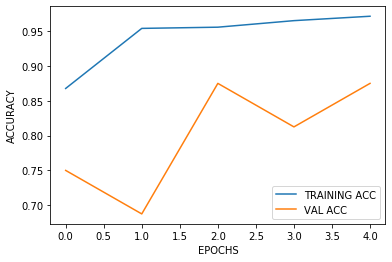

In [16]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(epochs,val_acc)
plt.legend(['TRAINING ACC','VAL ACC'])
plt.show()

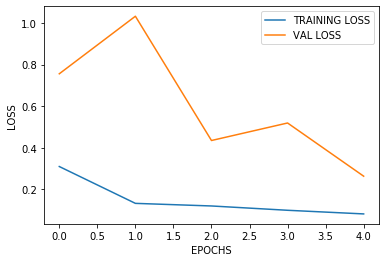

In [17]:
import matplotlib.pyplot as plt
plt.plot(epochs,loss)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.plot(epochs,val_loss)
plt.legend(['TRAINING LOSS','VAL LOSS'])
plt.show()

In [18]:
print("Accuracy : ",accuracy[-1]*100)


Accuracy :  97.14340567588806


In [19]:
IMG_SIZE = 50

t = np.array(test_gen)
t

array(<tensorflow.python.keras.preprocessing.image.ImageDataGenerator object at 0x0000023606826208>,
      dtype=object)

In [20]:
import pandas as pd 

p = model.predict_generator(test_generator)

pre = pd.DataFrame(p)

pre["filename"] = test_generator.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)

Instructions for updating:
Please use Model.predict, which supports generators.


In [21]:
pre['pre'] = (pre[0]>0.5).apply(int)

pre

,0,filename,label,pre
0,0.670552,NORMAL\IM-0001-0001.jpeg,0,1
1,0.999861,NORMAL\IM-0003-0001.jpeg,0,1
2,0.999995,NORMAL\IM-0005-0001.jpeg,0,1
3,0.892610,NORMAL\IM-0006-0001.jpeg,0,1
4,0.777568,NORMAL\IM-0007-0001.jpeg,0,1
...,...,...,...,...
619,0.999996,PNEUMONIA\person96_bacteria_465.jpeg,1,1
620,0.869075,PNEUMONIA\person96_bacteria_466.jpeg,1,1
621,0.999683,PNEUMONIA\person97_bacteria_468.jpeg,1,1
622,0.999919,PNEUMONIA\person99_bacteria_473.jpeg,1,1


In [22]:

from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score

recall_score(pre["label"],pre["pre"]) 

0.8051282051282052

In [23]:
roc_auc_score(pre['label'], pre['pre']) #this is a very low score and suggests further tuning is required

0.502991452991453

In [24]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')